# 8 案例分析

其它有关数值算法与案例分析的有趣内容. 仅作了解. (实在太有趣了所以实现了好多)

## 计算机图形学

* 曲线 / 曲面设计
* 渐变 (gradient)
* 动画

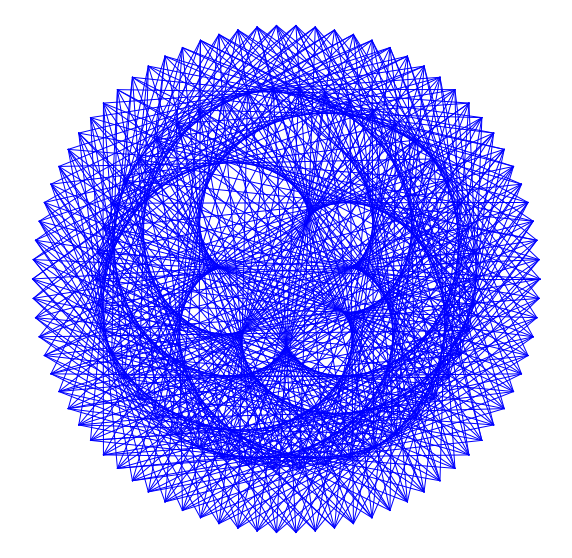

In [112]:
from matplotlib import pyplot as plt 
import numpy as np 
from math import gcd 
# https://tieba.baidu.com/p/6183088440
def Orbit(fig, r1 = 3, r2 = 4, n1 = 23, n2 = 37, time = 1000):
    """In polar coordinate, let  A (r1, 2pi*t/n1) and B (r2, 2pi*t/n2) spins around as t=1,2,3... 
       Draw the envelope of segment AB"""
    a1 = np.pi / n1 
    a2 = np.pi / n2
    for i in range(time):
        fig.plot([r1*np.cos(a1*i), r2*np.cos(a2*i)], [r1*np.sin(a1*i), r2*np.sin(a2*i)], c='blue', linewidth=1)
         

fig_ = plt.figure(figsize = (10,10))
fig = fig_.add_subplot(1,1,1)
plt.axis('off')
plt.axis('equal')
Orbit(fig, r1 = 3, r2 = 4, n1 = 23, n2 = 41, time = 600)
plt.show()

## 分形

* 康托集 (Cantor set)
* 科赫雪花 (Koch snowflake)
* 希尔伯特曲线 (Hilbert curve)
* 谢尔宾斯基三角形 (Sierpiński triangle)
* 曼德勃罗集 (Mandelbrot set)
* 朱丽叶集 (Julia set)
* 牛顿分形 (Newton fractal)

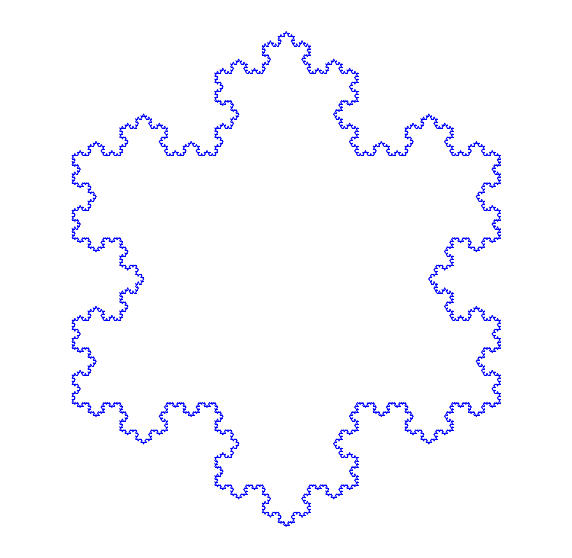

In [29]:
from matplotlib import pyplot as plt 
# Koch snowflake
# https://mathworld.wolfram.com/KochSnowflake.html
def KochSnowflake(fig, depth = 5, color='b', linewidth=1):
    from math import cos, sin, pi
    angle = - pi / 3
    x , y = 0 , 2
    r = 2*3**.5/(3**depth)

    # write with Lindenmayer System
    s = 'f-f-f'
    for i in range(depth):
        s = s.replace('f', 'f+f-f+f')
    
    for c in s:
        if c == 'f':
            x2 , y2 = x+cos(angle)*r , y+sin(angle)*r
            fig.plot([x, x2], [y, y2], c=color, linewidth=linewidth)
            x , y = x2, y2
        elif c == '-':
            angle -= 2 * pi / 3 
        elif c == '+':
            angle += pi / 3   


fig_ = plt.figure(figsize=(10,10))
fig = fig_.add_subplot(1,1,1)
KochSnowflake(fig)
plt.axis('equal')
plt.axis('off')
plt.show()

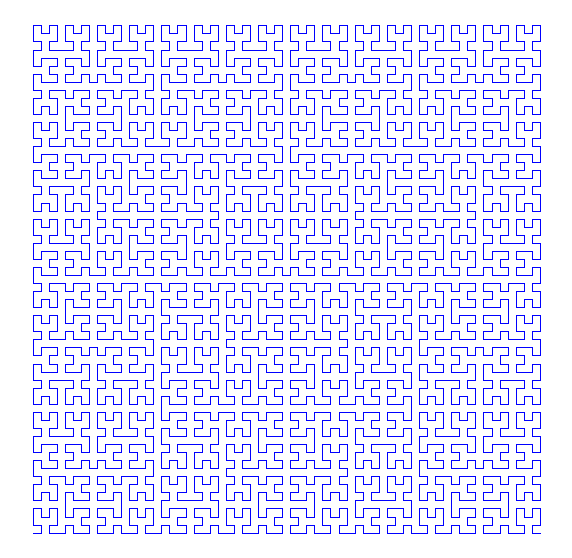

In [41]:
from matplotlib import pyplot as plt 
# Hilbert Curve
# https://mathworld.wolfram.com/HilbertCurve.html
def HilbertCurve(fig, depth = 5, color='b', linewidth=1):
    x , y = -1 , -1 
    dx , dy = 2/(2**(depth+1)-1) , 0

    # write with Lindenmayer System
    s = 'l'
    for i in range(depth):
        s = s.replace('r', 'u')
        s = s.replace('l', '+rf-lfl-fr+')
        s = s.replace('u', '-lf+rfr+fl-')

    def forward(x, y, dx, dy):
        x2, y2 = x+dx, y+dy 
        fig.plot([x, x2], [y, y2], c=color, linewidth=linewidth)
        return x2, y2 
        
    for c in s:
        if c == 'l':
            dx, dy = -dy, dx 
            x , y = forward(x, y, dx, dy)
            dx, dy = dy, -dx 
            x , y = forward(x, y, dx, dy)
            dx, dy = dy, -dx 
            x , y = forward(x, y, dx, dy)
            dx, dy = -dy, dx 
        elif c == 'r':
            dx, dy = dy, -dx 
            x , y = forward(x, y, dx, dy)
            dx, dy = -dy, dx 
            x , y = forward(x, y, dx, dy)
            dx, dy = -dy, dx 
            x , y = forward(x, y, dx, dy)
            dx, dy = dy, -dx 
        elif c == 'f':
            x , y = forward(x, y, dx, dy)
        elif c == '-': # angle -= 90
            dx, dy = dy, -dx
        elif c == '+': # angle += 90
            dx, dy = -dy, dx


fig_ = plt.figure(figsize=(10,10))
fig = fig_.add_subplot(1,1,1)
HilbertCurve(fig)
plt.axis('equal')
plt.axis('off')
plt.show()

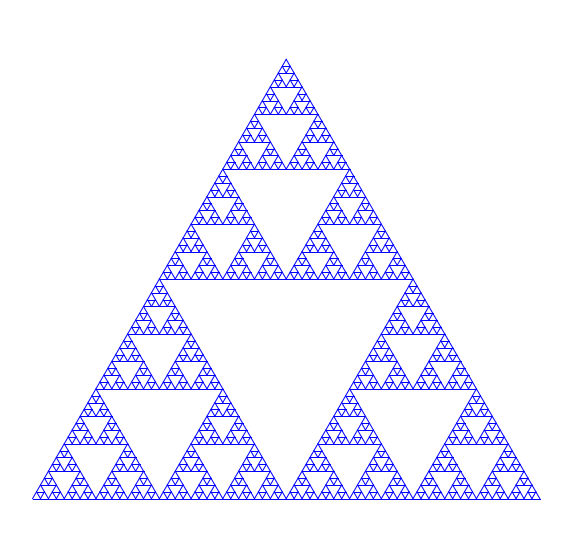

In [24]:
from matplotlib import pyplot as plt 
# Sierpinski triangle 
# https://mathworld.wolfram.com/SierpinskiSieve.html
def SierpinskiTriangle(fig, depth = 5, color='b', linewidth=1):
    t = 3**.5
    fig.plot([-t, 0], [-1, 2], c=color, linewidth=linewidth)
    fig.plot([t, 0], [-1, 2], c=color, linewidth=linewidth)
    fig.plot([-t, t], [-1, -1], c=color, linewidth=linewidth)
    
    def DFS(x, y, depth, r):
        fig.plot([x-t*r, x+t*r], [y+r, y+r], c=color, linewidth=linewidth)
        fig.plot([x-t*r, x], [y+r, y-2*r], c=color, linewidth=linewidth)
        fig.plot([x+t*r, x], [y+r, y-2*r], c=color, linewidth=linewidth)
        if depth > 0:
            DFS(x, y+2*r, depth-1, r*.5)
            DFS(x-t*r, y-r, depth-1, r*.5)
            DFS(x+t*r, y-r, depth-1, r*.5)

    DFS(0, 0, depth, .5)


fig_ = plt.figure(figsize=(10,10))
fig = fig_.add_subplot(1,1,1)
SierpinskiTriangle(fig)
plt.axis('equal')
plt.axis('off')
plt.show()

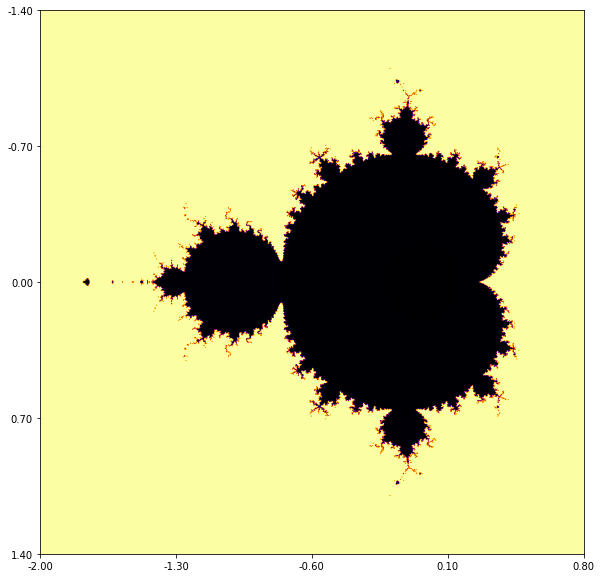

In [96]:
from matplotlib import pyplot as plt 
import numpy as np 
# Mandelbrot set: z_{n+1} <- z_{n}^2 + z_0 that does not to infinity
# https://mathworld.wolfram.com/MandelbrotSet.html
def Mandelbrot(x1=-2, x2=0.8, y1=-1.4, y2=1.4, n=500, iter=20, clip=10000):
    """Apply recurrsion z_{n+1} = z_{n}^2 + z_{0} on each z in [x1,x2] x [y1,y2] for given iterations"""
    z = np.tile(np.linspace(x1, x2, n), n).reshape((n,n)).astype('complex64')
    z += 1j * np.linspace(y2, y1, n).reshape((n,1))
    z0 = z.copy()
    for i in range(iter):
        z = (z*z+z0)
        z = np.where(np.abs(z) > clip, clip, z)
    return z 
x1, x2, y1, y2 = -2, .8, -1.4, 1.4
n = 1000
z = Mandelbrot(x1,x2,y1,y2, n = n, iter=30)

plt.figure(figsize=(10,10))
plt.imshow(np.sqrt(np.abs(z)), cmap = 'inferno')
# plt.colorbar()
ax = plt.gca()
m = 5
ax.set_xticks(np.linspace(0, n, m))
ax.set_xticklabels(['%.2f'%i for i in np.linspace(x1, x2, m)])
ax.set_yticks(np.linspace(0, n, m))
ax.set_yticklabels(['%.2f'%i for i in np.linspace(y1, y2, m)])
plt.show()

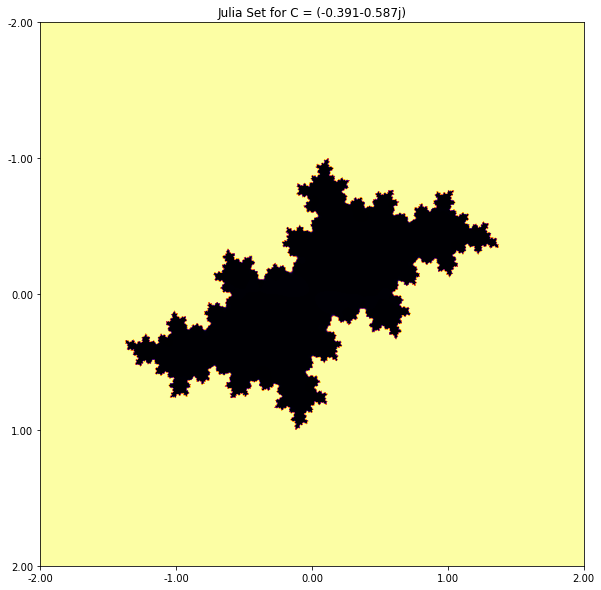

In [97]:
from matplotlib import pyplot as plt 
import numpy as np 
# Julia set: z_{n+1} <- z_{n}^2 + c that does not to infinity
# https://mathworld.wolfram.com/JuliaSet.html
def JuliaSet(x1=-2, x2=0.8, y1=-1.4, y2=1.4, n=500, c=-1, iter=20, clip=10000):
    """Apply recurrsion z_{n+1} = z_{n}^2 + C on each z in [x1,x2] x [y1,y2] for given iterations"""
    z = np.tile(np.linspace(x1, x2, n), n).reshape((n,n)).astype('complex64')
    z += 1j * np.linspace(y2, y1, n).reshape((n,1))
    for i in range(iter):
        z = (z*z+c)
        z = np.where(np.abs(z) > clip, clip, z)
    return z 
x1, x2, y1, y2 = -2, 2, -2, 2
n = 1000
c = -.391 - .587j  # beautiful values: -.123+.745j,  -.75,   1j,   -.391-.587j
z = JuliaSet(x1,x2,y1,y2, n = n, c = c, iter=20)

plt.figure(figsize=(12,10))
plt.imshow((np.sqrt(abs(z))), cmap = 'inferno')
# plt.colorbar()
ax = plt.gca()
m = 5
ax.set_xticks(np.linspace(0, n, m))
ax.set_xticklabels(['%.2f'%i for i in np.linspace(x1, x2, m)])
ax.set_yticks(np.linspace(0, n, m))
ax.set_yticklabels(['%.2f'%i for i in np.linspace(y1, y2, m)])
plt.title('Julia Set for C = %s'%c)
plt.show()

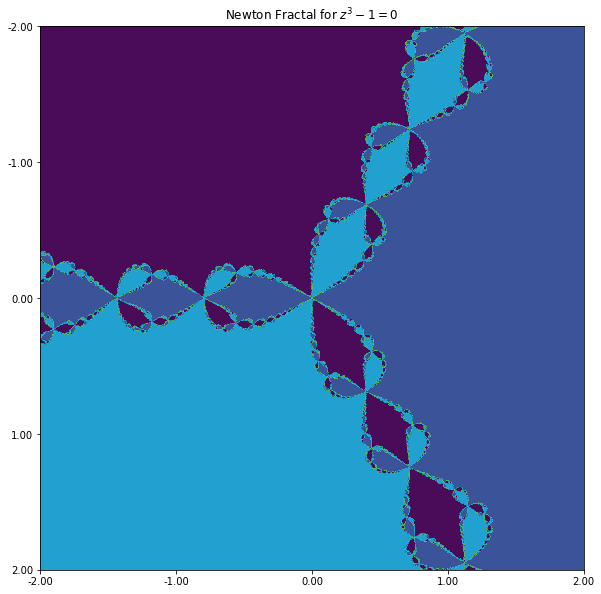

In [113]:
from matplotlib import pyplot as plt 
from matplotlib import colors
import numpy as np 
# Newton fractal 
# https://www.bilibili.com/video/BV1HQ4y1q78v
def NewtonFractal(f, x1=-2, x2=2, y1=-2, y2=2, n=500, iter=20):
    """Compute Newton fractal of numpy-polynomial f in [x1,x2]x[y1,y2] for given iterations"""
    df = np.polyder(f)
    z = np.tile(np.linspace(x1, x2, n), n).reshape((n,n)).astype('complex64')
    z += 1j * np.linspace(y2, y1, n).reshape((n,1))
    for i in range(iter):
        z -= f(z) / df(z)

    roots = np.roots(f)
    distance = np.abs(z - roots[0])
    s = np.zeros(z.shape, dtype='int')
    for i, root in enumerate(roots[1:]):
        i = i + 1
        distance2 = np.abs(z - roots[i])
        s = np.where(distance2 < distance, i, s)
        distance = distance2 

    return s 
x1, x2, y1, y2 = -2, 2, -2, 2
n = 1000

f = np.poly1d([1,0,0,-1])

z = NewtonFractal(f, x1,x2,y1,y2, n = n, iter=20)

plt.figure(figsize=(12,10))
plt.imshow(z, cmap=
        colors.ListedColormap(['#4A0B58', '#19858F', '#20A1D0', '#57B861', '#3A5399'], 'indexed'))
        # palette borrowed from 3b1b
# plt.colorbar()
ax = plt.gca()
m = 5
ax.set_xticks(np.linspace(0, n, m))
ax.set_xticklabels(['%.2f'%i for i in np.linspace(x1, x2, m)])
ax.set_yticks(np.linspace(0, n, m))
ax.set_yticklabels(['%.2f'%i for i in np.linspace(y1, y2, m)])
def formatter(x, y):
    a = '+' if x==1 else ('-' if x==-1 else (('+' if x>0 else '') + '%s'%x))
    b = 'z^{%s}'%y if y > 1 else ('z' if y == 1 else '')
    if y==0 and (x==1 or x==-1): a += '1' 
    return a + b
title = ''.join(formatter(i,j) for j,i in zip(range(f.coefficients.size-1,-1,-1),f.coefficients) if i!=0)[1:]
plt.title('Newton Fractal for $%s=0$'%title)
plt.show()

## 逼近
* 帕德逼近 (Pade Approximation)
* Zolartorev Rational Approximation
* Bézier 曲线
* 整数关系发现 (integer relation detection)

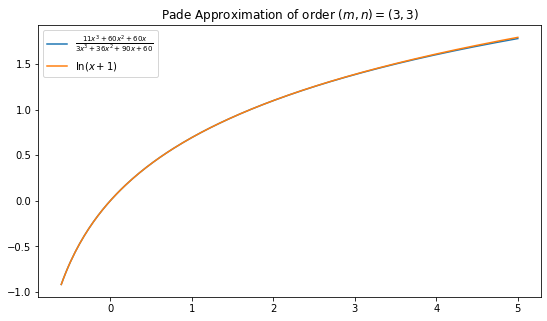

(11*x**3 + 60*x**2 + 60*x)/(3*x**3 + 36*x**2 + 90*x + 60)

In [14]:
# Pade Approximation
import sympy as sp 
def Pade(f = [], m = 3, n = None):
    """Input a taylor expansion of f to order (m+n), compute (m,n)-order Pade approximation"""
    # https://math.stackexchange.com/questions/860293 
    # https://zhuanlan.zhihu.com/p/92873681 
    
    if n is None: n = m
    A: sp.Matrix = sp.Matrix.zeros(n)
    b = sp.Matrix.zeros(n, 1)
    for i in range(n):
        for j in range(n):
            A[i,j] = f[m+i-j]
    for i in range(n):
        b[i] = -f[m+i+1]
    
    # denominator / numerator
    q = [1] + list(A.LUsolve(b))
    p = [0] * (m+1)
    for i in range(m+1):
        p[i] = sum(f[i-j] * q[j] for j in range(min(n+1,i+1)))

    t = sp.symbols('x')
    return sp.cancel(sum([p[i] * t ** i for i in range(m+1)]) / 
                    sum([q[i] * t ** i for i in range(n+1)]))
        
m , n = 3, 3
f = (Pade([0] + [sp.Rational(-1,i)*(-1)**i for i in range(1,m+n+1)], m, n)) # expansion of ln(x+1)
from matplotlib import pyplot as plt 
import numpy as np 
x = np.linspace(-0.6, 5, 200)
y = [f.subs('x', i) for i in x]
plt.figure(figsize = (9,5))
plt.plot(x, y)
plt.plot(x, np.log(x+1))
plt.legend(['$%s$'%sp.latex(f), '$\ln(x+1)$'])
plt.title('Pade Approximation of order $(m,n)=(%d,%d)$'%(m,n))
plt.show()
f

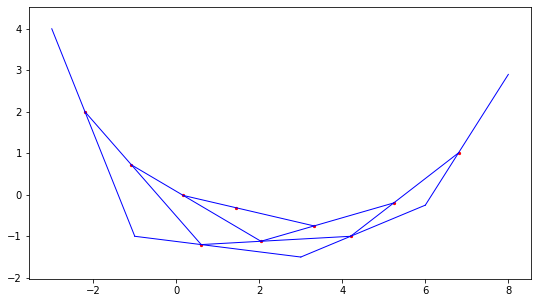

In [43]:
from matplotlib import pyplot as plt 
# Bezier Curve
# https://mathworld.wolfram.com/BezierCurve.html
def BezierCurve(fig, points = [], ratio = .5, color='b', linewidth=1, pointcolor='r', pointsize=5):
    if len(points) == 0:
        return 
    new_points = []
    for p1, p2 in zip(points[:-1], points[1:]):
        fig.plot([p1[0], p2[0]], [p1[1], p2[1]], c=color, linewidth=linewidth)
        new_points.append((p1[0]-(p1[0]-p2[0])*ratio, p1[1]-(p1[1]-p2[1])*ratio))
    plt.scatter([i[0] for i in new_points], [i[1] for i in new_points], c=pointcolor, s=pointsize)
    BezierCurve(fig, new_points, ratio, color, linewidth, pointcolor, pointsize)


fig_ = plt.figure(figsize=(9,5))
fig = fig_.add_subplot(1,1,1)
BezierCurve(fig, [(-3,4), (-1,-1), (3,-1.5), (6,-.25), (8,2.9)], ratio=.4)
plt.axis('equal')
# plt.axis('off')
plt.show()

In [86]:
import numpy as np 
# PSLQ algorithm for integer relation detection
def PSLQ(x, maxiter = 100000, bound = 2147483647, gamma = 1.1547005384, tol=1e-11,
         float_type = 'float64', int_type = 'int64'):
    """
    Find integer relations of a given REAL vector x using PSLQ algorithm.

    References: 
    [1] https://www.davidhbailey.com/dhbpapers/cpslq.pdf 
    [2] https://www.ams.org/journals/mcom/2001-70-236/S0025-5718-00-01278-3/S0025-5718-00-01278-3.pdf 
    [3] https://arminstraub.com/downloads/math/pslq.pdf 
    """
    x = np.array(x, dtype = float_type)
    n = x.size 
    assert n >= 2, 'Must have at least 2 elements'
    x = x / np.linalg.norm(x)

    H = np.zeros((n, n-1), dtype = float_type)

    # compute the truncated sum of square
    s = np.cumsum((x * x)[::-1])[::-1]

    # initialize H
    for j in range(n-1):
        H[j,j] =  1. / np.sqrt((1. + x[j]*x[j]/s[j+1]))
        H[j+1:,j] = -x[j] / np.sqrt(s[j] * s[j+1])
        H[j+1:,j] *= x[j+1:]

    def HermiteReduction(H, A, B, x):
        """
        See in-place Hermite reduction at section 2 of paper [2]
        """
        for i in range(1, n):
            if H[i-1,i-1] == 0:
                # See paper [1] Lemma 5.
                # this case happens only if the machine precision gets exhausted
                return False 

            for j in range(i-1, -1, -1):
                q = round(H[i,j] / H[j,j])
                x[j] += q * x[i]
                H[i,:j+1] -= q * H[j,:j+1]
                A[i,:]    -= q * A[j,:]
                B[:,j]    += q * B[:,i]

        return True

    # initialization
    A = np.eye(n, dtype = int_type)
    B = np.eye(n, dtype = int_type)
    if not HermiteReduction(H, A, B, x):
        return None 
    
    gammas = np.cumprod(np.array([gamma for i in range(n-1)], dtype = float_type)) # preprocess
    
    def ExchangeRow(A, r1, r2):
        # exchange row r1, r2 of matrix A
        tmp = A[r2].copy()
        A[r2] = A[r1]
        A[r1] = tmp 
    
    def ExchangeCol(A, r1, r2):
        # exchange column r1, r2 of matrix A
        tmp = A[:,r2].copy()
        A[:,r2] = A[:,r1]
        A[:,r1] = tmp 
    
    for iter_ in range(maxiter):
        # Step 1. Exchange
        r = np.argmax(gammas * abs(H.flat[::n]))

        # exchange row r and r+1 of A
        ExchangeRow(A, r, r+1)
        ExchangeRow(H, r, r+1)
        ExchangeRow(x, r, r+1)
        ExchangeCol(B, r, r+1)
        if r != n-2:
            # Step 2. Corner: fix the lower triangular property of H after row exchange
            # this is done by a rotation matrix (Givens matrix)
            a = H[r, r]
            b = H[r, r+1]
            
            if abs(a) > abs(b): # numerically stable
                tant = b / a
                cost = 1. / np.sqrt(1 + tant * tant)
                sint = cost * tant 
            else:
                cott = a / b 
                sint = 1. / np.sqrt(1 + cott * cott)
                cost = sint * cott 
            
            tmp      = H[:,r] * cost    + H[:,r+1] * sint 
            H[:,r+1] = H[:,r] * (-sint) + H[:,r+1] * cost 
            H[:,r]   = tmp 

        # else: nothing to exchange when r == n-1, goto Step 3.

        # Step 3. Reduction
        if not HermiteReduction(H, A, B, x):
            # the precision gets exhausted
            return None 

        # Step 4. Termination
        for i in range(n):
            if abs(x[i]) < tol: # hit!
                return B[:,i]
                
        if bound is not None and bound * abs(np.max(H.flat[::n])) < 1:
            # |m| > 1/max{H[j,j]} > bound
            # this implies some of the coefficient might be larger than the bound
            return None 

    return None 

from mpmath import mp  # High precision computation
mp.dps = 20
n = 1000000
s = sum(1/(i*i) for i in mp.arange(5, n, 4)) + 1/mp.mpmathify(n)/4 # residue term, raise precision fast
print('sum 1/(4n+1)^2 from n = 1 to infinity ≈', s)
c = 0.9159655941772190150546 # catlan constant
pi = 3.1415926535897932384626
pi2 = pi*pi
print(PSLQ([s,c,pi,pi2,1], tol=1e-10))

sum 1/(4n+1)^2 from n = 1 to infinity ≈ 0.074833072156444421277
[-16   8   0   1 -16]


Implies 
$$-16\sum_{n=1}^\infty \frac{1}{(4n+1)^2}+8C+\pi^2 -16 = 0\quad\Leftrightarrow\quad 
\sum_{n=1}^\infty \frac{1}{(4n+1)^2}=\frac{\pi^2}{16}-1+\frac C2
$$